# Table of Contents

## 1. Introduction
- Overview of the project
- Objectives of the analysis
- Description of the dataset

## 2. Understanding the Data
- Dataset overview
- Description of features
- Identifying target variable (Final Course Scores)

## 3. Data Preprocessing
- Detecting and addressing outliers
- Handling missing data
- Encoding categorical variables
- Scaling numerical features

## 4. Exploratory Data Analysis (EDA)
- Analyzing feature distributions
- Correlation analysis
- Visualizations
  - Box plots
  - Histograms
- Identifying important features

## 5. Model Development and Evaluation
- Splitting the data (train-test split)
- Selecting appropriate models
  - Linear Regression
  - Random Forest
- Metrics for regression models
  - R-squared
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)


## 6. Feature engineering and Re-Modelling:
- Creating a new feature to better predict target variable
- Running the models as per previous step

## 7. Conclusion
- Summary of findings
- Potential limitations
- Suggestions for future work



## 1. Introduction

The educational sector is always on the lookout of elevating student performance and has thus, identified core areas that aid in achieving academic success. In this case, I am working as a data analyst for an institute that aims to delve deep into the issues at hand through the use of data which are able to give solutions to them. 

The institution has collected data on 1,000 students, documented in the student_performance_data.csv file. 
The other features included in this dataset are: students’ study habits, their attendance, their social and economic status, and their final grades in the course.

## 2. Understanding the Data
- Dataset overview
- Description of features
- Identifying target variable (Final_Score)

In [1]:
#path to the datafile
data_path = 'DataScienceProjectAssignments/student_performance_data.csv'

In [2]:
# creating a dataframe to store the csv datafile
import pandas as pd

df_student = pd.read_csv(data_path)
print(f"The total amount of rows in the Dataframe are : {df_student.shape[0]}")
print(f"The total amount of columns in the Dataframe are : {df_student.shape[1]}")

The total amount of rows in the Dataframe are : 1000
The total amount of columns in the Dataframe are : 8


In [3]:
# List all column names
print("The columns in the DataFrame are:")
print(df_student.columns)


The columns in the DataFrame are:
Index(['Student_ID', 'Hours_Studied', 'Attendance_Rate', 'Previous_Score',
       'Has_Internet', 'Participates_Activities', 'Parent_Education',
       'Final_Score'],
      dtype='object')


In [4]:
# Overview of the DataFrame
df_student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               1000 non-null   object 
 1   Hours_Studied            902 non-null    float64
 2   Attendance_Rate          900 non-null    float64
 3   Previous_Score           900 non-null    float64
 4   Has_Internet             1000 non-null   int64  
 5   Participates_Activities  1000 non-null   int64  
 6   Parent_Education         1000 non-null   int64  
 7   Final_Score              1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


- Here the Dataframe has majorly numerical columns with 3 columns having null/missing values and one string column which would need to be dropped for analysis

In [5]:
#dropping studentid column as it is a string column and would make less use in the analysis
df_student = df_student.drop(columns= 'Student_ID')

In [6]:
#execute to check the data for 5 rows
df_student.head(5)

,Hours_Studied,Attendance_Rate,Previous_Score,Has_Internet,Participates_Activities,Parent_Education,Final_Score
0,17.483571,58.374129,66.907909,1,0,1,86.199170
1,NaN,NaN,62.478436,1,1,3,79.883667
2,18.238443,81.821512,73.191745,1,0,2,109.137381
3,22.615149,NaN,83.404504,0,0,2,62.216630
4,13.829233,51.579307,51.248275,1,0,1,82.771526


In [7]:
# checking the target variable Final_Score

df_student['Final_Score'].describe()

count    1000.000000
mean       73.973526
std        15.764143
min        21.273720
25%        63.819580
50%        74.161354
75%        84.396909
max       121.474492
Name: Final_Score, dtype: float64

- There are no null values in this column, there are some outliers

In [8]:
#descriptive stats for the columns
df_student.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,902.0,15.609215,6.085385,1.206337,11.898891,15.340204,18.431040,59.457888
Attendance_Rate,900.0,75.062591,14.391614,50.160913,62.349857,75.706270,86.887179,99.970686
Previous_Score,900.0,70.124820,9.595858,39.804878,63.674761,70.172340,76.526167,101.377485
Has_Internet,1000.0,0.789000,0.408223,0.000000,1.000000,1.000000,1.000000,1.000000
Participates_Activities,1000.0,0.486000,0.500054,0.000000,0.000000,0.000000,1.000000,1.000000
Parent_Education,1000.0,1.899000,0.715060,1.000000,1.000000,2.000000,2.000000,3.000000
Final_Score,1000.0,73.973526,15.764143,21.273720,63.819580,74.161354,84.396909,121.474492


In [9]:
# using the .corr() method to find the relationship strength between the columns, can also use heat map.
df_student.corr()

,Hours_Studied,Attendance_Rate,Previous_Score,Has_Internet,Participates_Activities,Parent_Education,Final_Score
Hours_Studied,1.000000,0.054444,0.050129,-0.045586,-0.011762,0.022814,0.005431
Attendance_Rate,0.054444,1.000000,0.016929,0.023512,0.077207,-0.034780,0.028950
Previous_Score,0.050129,0.016929,1.000000,0.046482,-0.010588,0.043688,0.054307
Has_Internet,-0.045586,0.023512,0.046482,1.000000,-0.016937,-0.004496,0.040941
Participates_Activities,-0.011762,0.077207,-0.010588,-0.016937,1.000000,-0.044551,0.002148
Parent_Education,0.022814,-0.034780,0.043688,-0.004496,-0.044551,1.000000,-0.017853
Final_Score,0.005431,0.028950,0.054307,0.040941,0.002148,-0.017853,1.000000


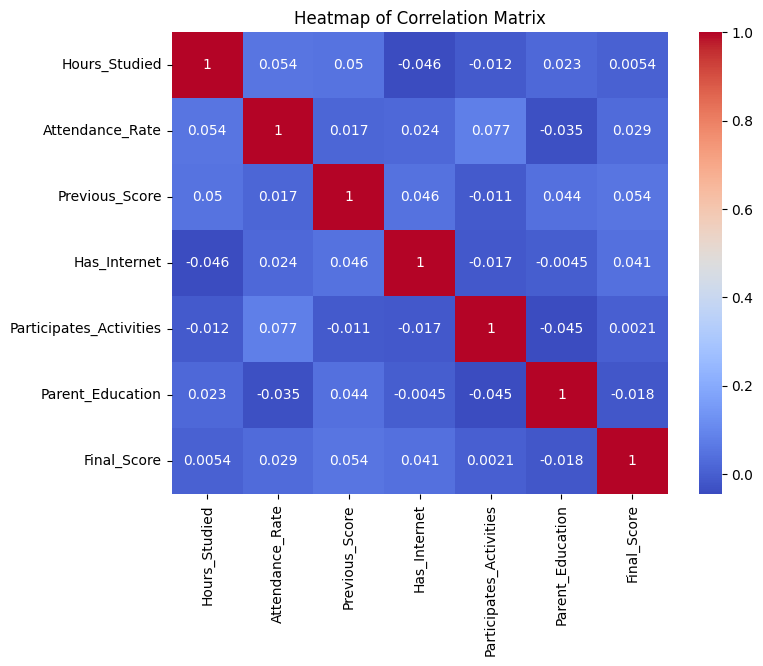

In [10]:
#using heat map to find the .corr() between the columns

import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df_student.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


plt.title("Heatmap of Correlation Matrix")
plt.show()


# Low Correlations: 
-   The variables in the dataset generally show weak correlations with each other and with Final_Score. This suggests limited linear relationships among them.
-   Final_Score Predictors:
Previous_Score (0.054) has the highest, albeit weak, positive correlation with Final_Score.
Attendance_Rate (0.029) and Has_Internet (0.041) also show weak positive correlations.

# The dataset shows little evidence of strong linear relationships.
- Further analysis, such as feature engineering or testing nonlinear relationships, might help identify stronger predictors for Final_Score.


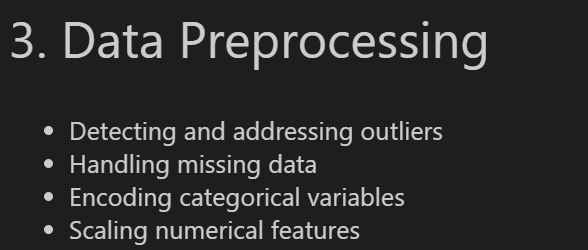

In [11]:

# Checking for outliers in the dataframe and capping them to the nearest bound.



def handle_outliers_iqr(df):

    for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Apply to numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(outliers)
        
        #Cap outliers (clip the values)
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
    return df


df_student_cleaned = handle_outliers_iqr(df_student)


     Hours_Studied  Attendance_Rate  Previous_Score  Has_Internet  \
74        1.901274              NaN       68.656913             1   
159      49.627654        96.547435       66.303897             0   
179      28.600846        83.379669       70.895807             1   
196      46.641478        61.363481             NaN             1   
209      34.263657        69.941139       80.701502             1   
215      51.210787        85.906154       68.554813             1   
217      41.570544              NaN       66.920385             1   
262       1.206337        91.993065       66.721053             0   
352      41.114711        89.101404       57.608929             1   
425      57.260576              NaN       76.045153             1   
454      56.980690        76.765507       71.058945             0   
478      30.394404        89.345169       76.802161             1   
553      59.457888        82.290541       63.396789             0   
646       1.515567        89.24484

In [12]:
#returning the nulls/missing values for the columns
df_student_cleaned.isnull().sum()

Hours_Studied               98
Attendance_Rate            100
Previous_Score             100
Has_Internet                 0
Participates_Activities      0
Parent_Education             0
Final_Score                  0
dtype: int64

In [13]:
# finding the descriptive statistics for the columns with null values
df_student_cleaned[['Hours_Studied', 'Attendance_Rate', 'Previous_Score']].describe().T


,count,mean,std,min,25%,50%,75%,max
Hours_Studied,902.0,15.362334,4.993432,2.100667,11.898891,15.340204,18.431040,28.229264
Attendance_Rate,900.0,75.062591,14.391614,50.160913,62.349857,75.706270,86.887179,99.970686
Previous_Score,900.0,70.113639,9.500985,44.397652,63.674761,70.172340,76.526167,95.803276


In [14]:
# filling the missing values with the median value for the columns with nulls

def fill_missing_with_median(df, columns):
    
    for column in columns:
        df[column] = df[column].fillna(df[column].median())
    return df


columns_to_fill = ['Hours_Studied', 'Attendance_Rate', 'Previous_Score']

# Call the function to fill missing values with the median
df_student_cleaned = fill_missing_with_median(df_student_cleaned, columns_to_fill)


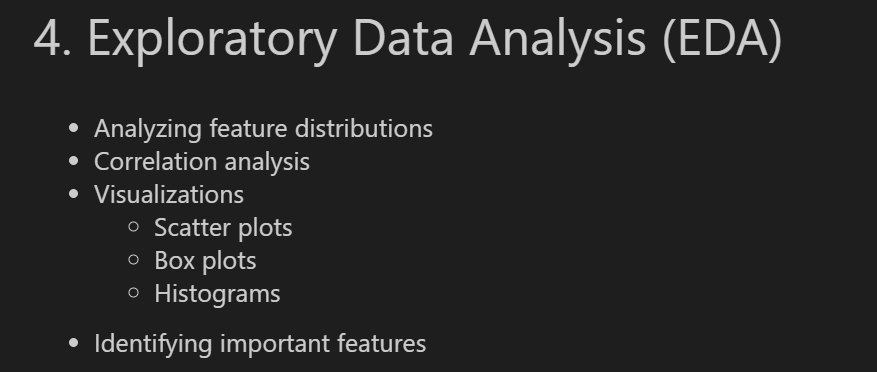

In [15]:
df_student_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hours_Studied            1000 non-null   float64
 1   Attendance_Rate          1000 non-null   float64
 2   Previous_Score           1000 non-null   float64
 3   Has_Internet             1000 non-null   int64  
 4   Participates_Activities  1000 non-null   int64  
 5   Parent_Education         1000 non-null   int64  
 6   Final_Score              1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


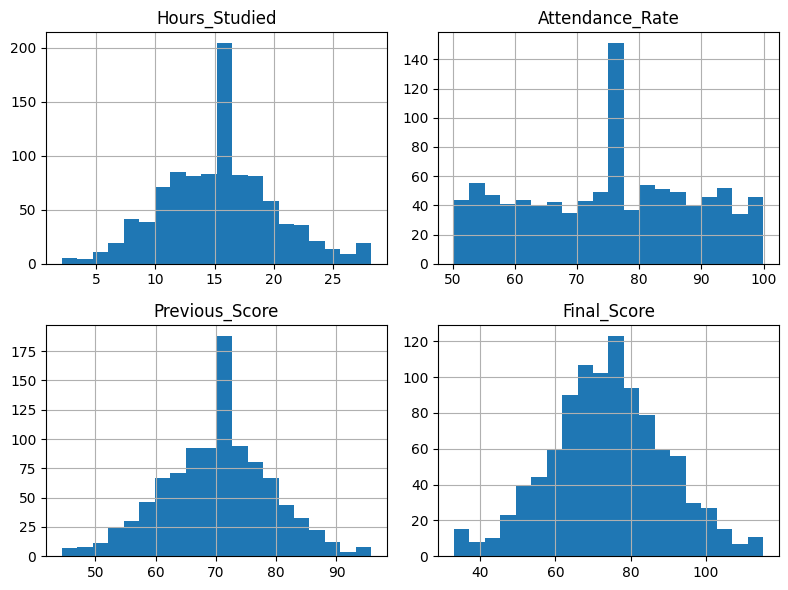

In [16]:
#analyzing feature distributions and not including the binary or categorical columns
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical columns
numerical_columns = ['Hours_Studied', 'Attendance_Rate', 'Previous_Score', 'Final_Score']
df_student_cleaned[numerical_columns].hist(figsize=(8, 6), bins=20)
plt.tight_layout()
plt.show()


In [17]:
df_student_cleaned[numerical_columns].corr()

,Hours_Studied,Attendance_Rate,Previous_Score,Final_Score
Hours_Studied,1.000000,0.050100,0.053129,0.022834
Attendance_Rate,0.050100,1.000000,0.013301,0.026329
Previous_Score,0.053129,0.013301,1.000000,0.052664
Final_Score,0.022834,0.026329,0.052664,1.000000


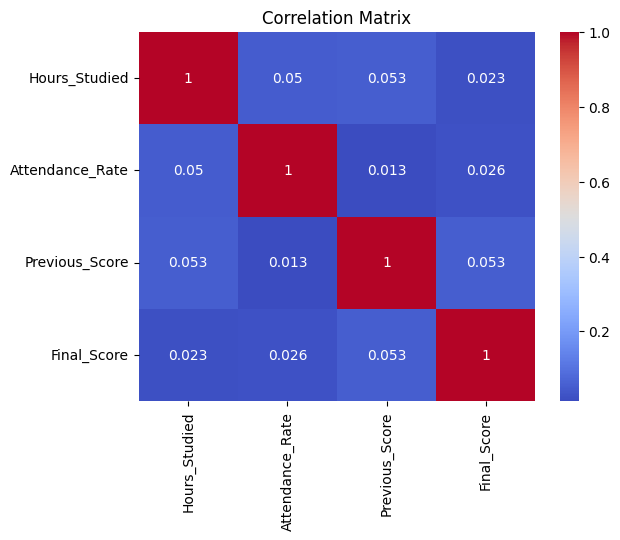

In [18]:
# Correlation matrix
corr_matrix = df_student_cleaned[numerical_columns].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Correlations after cleaning and clipping the dataframe:
# Correlations with Final_Score:
•	Previous_Score (0.052) shows the strongest correlation with Final_Score, indicating it remains a weak predictor even after cleaning and clipping.
•	Attendance_Rate (0.026) and Hours_Studied (0.023) have weak positive correlations with Final_Score.
-   Cleaning and clipping outliers did not significantly alter the correlations, as the relationships remain weak.
Previous_Score consistently appears as the most relevant factor for predicting Final_Score, though its influence is still minimal.
# The cleaned data highlights weak linear relationships among the variables, suggesting the need for further feature   engineering or exploring nonlinear models to better understand the drivers of Final_Score. 


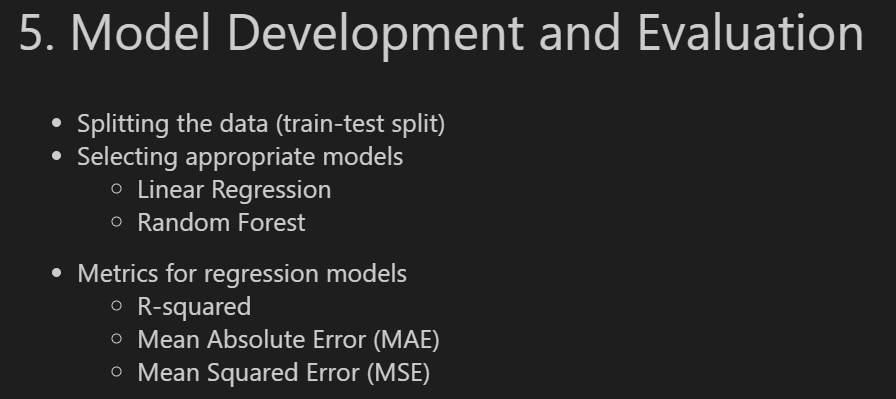

In [19]:
# Import  libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_student_cleaned[['Attendance_Rate', 'Hours_Studied', 'Participates_Activities', 'Has_Internet', 'Parent_Education']]  # Including the new feature
y = df_student_cleaned['Final_Score'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model performance
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_lr)

print(f"Mean Absolute Error (MAE): {mae}")

print(f"Linear Regression with Difference Scores - RMSE: {rmse_lr}, R²: {r2_lr}")


Mean Absolute Error (MAE): 13.674532022723021
Linear Regression with Difference Scores - RMSE: 16.989578243970723, R²: -0.015471773713565007


# RMSE (Root Mean Squared Error):

- An RMSE of 16.99 suggests that the model's predictions deviate significantly from the actual Final_Score values, indicating poor predictive performance.

# R² (Coefficient of Determination):

- An R² of -0.015 indicates that the model is performing worse than a simple mean-based model
- A negative R² shows that the features used in the regression do not explain the variance in the target variable and may even detract from the model's performance.

In [20]:
# Attempting to try with a different model, we will check with the Random Forest model
#  Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae}")

print(f"Random Forest Regression - RMSE: {rmse_rf}, R²: {r2_rf}")


Mean Absolute Error (MAE): 13.987555170178075
Random Forest Regression - RMSE: 17.96866166726464, R²: -0.1358843688773228


# RMSE (Root Mean Squared Error):

- RMSE: 17.97 indicates that the Random Forest model’s predictions are still significantly off from the actual Final_Score values, with the error similar to that of the Linear Regression model.
# R² (Coefficient of Determination):

- R²: -0.136 indicates that the Random Forest model is performing worse than predicting the mean Final_Score for all observations (similar to Linear Regression).
A negative R² implies that the model is not explaining the variance in the target variable and may even be performing worse than a trivial baseline model.

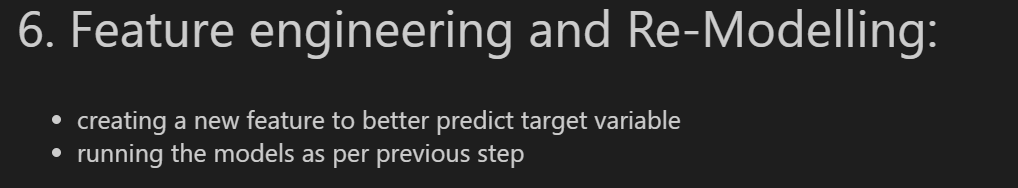

In [21]:
# Creating  the 'difference_scores' column which is a difference in value for final and previous scores

df_student_cleaned['difference_scores'] = df_student_cleaned['Final_Score'] - df_student_cleaned['Previous_Score']


In [22]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X = df_student_cleaned[['Attendance_Rate', 'Hours_Studied', 'Participates_Activities', 'Has_Internet', 'Parent_Education', 'difference_scores']]  # Adding 'difference_scores' as a feature
y = df_student_cleaned['Final_Score']  # Target variable remains the same


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# using linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluate the model performance
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

mae = mean_absolute_error(y_test, y_pred_lr)

print(f"Mean Absolute Error (MAE) for LR: {mae}")

# using Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE) for RF: {mae}")

print(f"Linear Regression with Difference Scores - RMSE: {rmse_lr}, R²: {r2_lr}")

print(f"Random Forest with Difference Scores - RMSE: {rmse_rf}, R²: {r2_rf}")


Mean Absolute Error (MAE) for LR: 6.381043041142191
Mean Absolute Error (MAE) for RF: 6.707719183711796
Linear Regression with Difference Scores - RMSE: 7.852476011921502, R²: 0.783071857711779
Random Forest with Difference Scores - RMSE: 8.446083706797344, R²: 0.7490348470676639


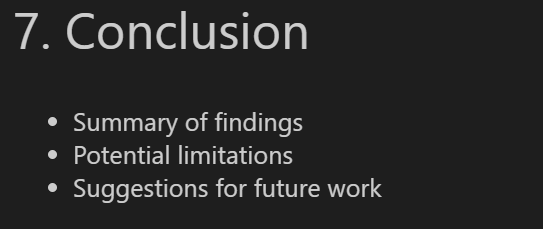

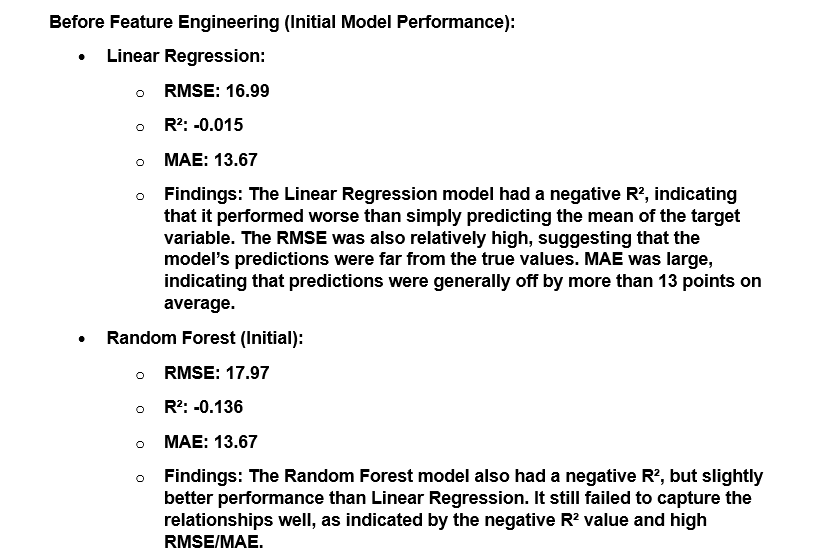

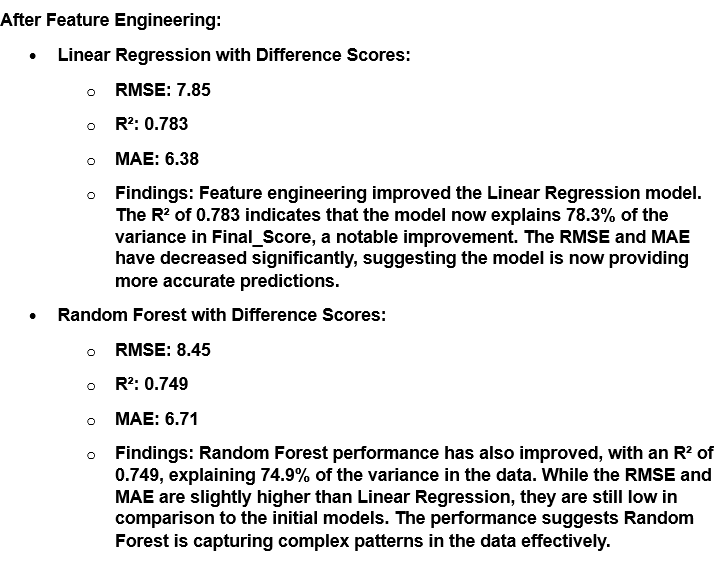

# Potential Limitations of the Current Model:
1.	Overfitting:
 - Random Forest is prone to overfitting, especially if the model has too many trees or if the training data has a lot of noise. While it performed well here, overfitting could affect its ability to generalize to unseen data.
2.	Underfitting in Linear Regression:
 - Linear Regression might still suffer from underfitting if the relationship between the features and the target is not truly linear. It could be missing more complex interactions that Random Forest could potentially capture.


# Suggestions for Future Work:
1.	Cross-Validation:
    -   Implement cross-validation to better assess model performance across different subsets of the data and to avoid    overfitting, especially for Random Forest.
2.	Feature Engineering Expansion:
    -  We can consider experimenting with adding more features or performing more advanced feature transformations, such as interaction terms or non-linear transformations, to help improve model performance further.


# Conclusion:
 -  Feature engineering has substantially improved the performance of both Linear Regression and Random Forest models. While Linear Regression has shown slightly better predictive accuracy, Random Forest remains a valuable tool for capturing complex patterns in the data.

    -   Further work involving cross-validation, and exploring advanced models can help refine the models and increase accuracy.

        -    The MAE and RMSE metrics have improved dramatically, but future work should also focus on preventing overfitting, improving interpretability, and expanding the feature set for continued model performance enhancement.
